## 3.3 Columns

There are four important verbs that affect the columns without changing the rows: **mutate()** creates new columns that are derived from the existing columns, **select()** changes which columns are present, **rename()** changes the names of the columns, and **relocate()** changes the positions of the columns.

### 3.3.1 mutate()

The job of mutate() is to add new columns that are calculated from the existing columns. By default, mutate() adds new columns on the right-hand side of your dataset, which makes it difficult to see what’s happening here. We can use the **.before** argument to instead add the variables to the left-hand side.

The . indicates that .before is an **argument** to the function, not the name of a third new variable we are creating. You can also use **.after** to add after a variable, and in both .before and .after you can use the variable name instead of a position.

Alternatively, you can control which variables are kept with the **.keep** argument. A particularly useful argument is "**used**" which specifies that we only keep the columns that were involved or created in the mutate() step.

In [1]:
library(tidyverse)
library(nycflights13)

flights |> 
  mutate(
    gain = dep_delay - arr_delay, # how much time a delayed flight made up in the air
    speed = distance / air_time * 60, # speed in miles per hour
    #.before = 1
    .after = day,
    .keep = "used"
  ) |>
  head(n = 1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


gain,speed,dep_delay,arr_delay,air_time,distance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-9,370.0441,2,11,227,1400


### 3.3.2 select() 

select() allows you to rapidly zoom in on a useful subset using operations based on the names of the variables.

*Select columns by name:*

`flights |> 
  select(year, month, day)`

*Select all columns between year and day (inclusive):*

`flights |> 
  select(year:day)`

*Select all columns except those from year to day (inclusive):*

`flights |> 
  select(!year:day)`

*Select all columns that are characters:*

`flights |> 
  select(where(is.character))`

There are a number of helper functions you can use within select():

- starts_with("abc")
- ends_with("xyz")
- contains("ijk")
- num_range("x", 1:3): matches x1, x2 and x3.

You can rename variables as you select() them by using *=*. The new name appears on the left-hand side of the =, and the old variable appears on the right-hand side.

`flights |> 
  select(tail_num = tailnum)`

### 3.3.3 rename() 

If you want to keep all the existing variables and just want to rename a few, you can use rename() instead of select().

`flights |> 
  rename(tail_num = tailnum)`

If you have a bunch of inconsistently named columns and it would be painful to fix them all by hand, check out `janitor::clean_names()` which provides some useful automated cleaning.

### 3.3.4 relocate() 

Use relocate() to move variables around. You might want to collect related variables together or move important variables to the front. By default relocate() moves variables to the front.

`flights |> 
  relocate(time_hour, air_time)`

You can also specify where to put them using the **.before** and **.after** arguments, just like in mutate().

`flights |> 
  relocate(year:dep_time, .after = time_hour)`

`flights |> 
  relocate(starts_with("arr"), .before = dep_time)`

### 3.3.5 Exercises

1. Compare dep_time, sched_dep_time, and dep_delay. How would you expect those three numbers to be related?

`sched_dep_time + dep_delay = dep_time`

2. Brainstorm as many ways as possible to select dep_time, dep_delay, arr_time, and arr_delay from flights.

`flights |>
  select(dep_time, dep_delay, arr_time, arr_delay)`

`flights |>
  select(dep_time:arr_delay) |>
  select(!sched_dep_time) |>
  select(!sched_arr_time)`

`flights |>
  select(starts_with("dep") , starts_with("arr"))`

3. What happens if you specify the name of the same variable multiple times in a select() call?

`flights |>
  select(year, year, year)`

It just selects once that column

4. What does the any_of() function do? Why might it be helpful in conjunction with this vector?

`variables <- c("year", "month", "day", "dep_delay", "arr_delay")`

`flights |>
  select(any_of(variables))`

Selects those columns

5. Does the result of running the following code surprise you? How do the select helpers deal with upper and lower case by default? How can you change that default?

`flights |> select(contains("TIME"))`

`flights |> select(contains("TIME", ignore.case = FALSE))`

It is case insensitive

In [2]:
# 6. Rename air_time to air_time_min to indicate units of measurement
# and move it to the beginning of the data frame.

flights |>
  rename(air_time_min = air_time) |>
  relocate(air_time_min) |>
  head(n = 1)

air_time_min,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute,time_hour
<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>
227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15,2013-01-01 05:00:00


7. Why doesn’t the following work, and what does the error mean?

`flights |> 
  select(tailnum) |> 
  arrange(arr_delay)`

`object 'arr_delay' not found`

After you select tailnum in select() statement you cannot use other columns

## 3.5 Groups

### 3.5.1 group_by() 

`flights |> 
  group_by(month)`

group_by() doesn’t change the data but, if you look closely at the output, you’ll notice that the output indicates that it is “grouped by” month (**Groups: month [12]**). This means subsequent operations will now work “by month”.

group_by() adds this grouped feature (referred to as **class**) to the data frame, which changes the behavior of the subsequent verbs applied to the data.

### 3.5.2 summarize() 

The most important grouped operation is a **summary**, which, if being used to calculate a single summary statistic, reduces the data frame to have a **single row for each group**.

`flights |> 
  group_by(month) |> 
  summarize(
    avg_delay = mean(dep_delay)
)`

All of our results are NAs (missing value). This happened because some of the observed flights had missing data in the delay column, and so when we calculated the mean including those values, we got an NA result. We’ll tell the mean() function to ignore all missing values by setting the argument na.rm to TRUE.

You can create any number of summaries in a single call to summarize(). One very useful summary is **n()**, which returns the number of rows in each group.

In [3]:
flights |> 
  group_by(month) |> 
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    n = n()
)

month,avg_delay,n
<int>,<dbl>,<int>
1,10.036665,27004
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243
7,21.727787,29425
8,12.611040,29327
9,6.722476,27574


### 3.5.3 The slice_ functions

`df |> slice_head(n = 1)` takes the first row from each group.

`df |> slice_tail(n = 1)` takes the last row in each group.

`df |> slice_min(x, n = 1)` takes the row with the smallest value of column x.

`df |> slice_max(x, n = 1)` takes the row with the largest value of column x.

`df |> slice_sample(n = 1)` takes one random row.

You can vary n to select more than one row, or instead of n =, you can use **prop = 0.1** to select (e.g.) 10% of the rows in each group.

*The flights that are most delayed upon arrival at each destination.*

`flights |> 
  group_by(dest) |> 
  slice_max(arr_delay, n = 1) |>
  relocate(dest)`

There are 105 destinations but we get 108 rows here. slice_min() and slice_max() keep tied values so n = 1 means give us all rows with the highest value. If you want exactly one row per group you can set **with_ties = FALSE**.

### 3.5.4 Grouping by multiple variables

You can create groups using more than one variable. For example, we could make a group for each date.

`daily <- flights |>  
  group_by(year, month, day)`

When you summarize a tibble grouped by more than one variable, **each summary peels off the last group**. To make it obvious what’s happening, dplyr displays a message that tells you how you can change this behavior.

`daily_flights <- daily |> 
  summarize(n = n())`

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.

If you’re happy with this behavior, you can explicitly request it in order to suppress the message. Change the default behavior by setting a different value, e.g., **"drop"** to drop all grouping or **"keep"** to preserve the same groups.

In [4]:
daily <- flights |>  
  group_by(year, month, day)

daily_flights <- daily |> 
  summarize(
    n = n(), 
    .groups = "drop_last"
  )

### 3.5.5 Ungrouping

You might also want to remove grouping from a data frame without using summarize(). You can do this with ungroup().

`daily |> 
  ungroup()`

When you summarize an ungrouped data frame you get a single row back because dplyr treats all the rows in an ungrouped data frame as belonging to one group.

In [5]:
daily |> 
  ungroup() |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE), 
    flights = n()
  )

avg_delay,flights
<dbl>,<int>
12.63907,336776


### 3.5.6 .by 

To group within a single operation.

.by works with all verbs and has the advantage that you don’t need to use the .groups argument to suppress the grouping message or ungroup() when you’re done.

`flights |> 
  summarize(
    delay = mean(dep_delay, na.rm = TRUE), 
    n = n(),
    .by = month
  )`

`flights |> 
  summarize(
    delay = mean(dep_delay, na.rm = TRUE), 
    n = n(),
    .by = c(origin, dest)
  )`

### 3.5.7 Exercises

In [6]:
# 1. Which carrier has the worst average delays?
# Challenge: can you disentangle the effects of bad airports vs. bad carriers?
# Why/why not?
# (Hint: think about flights |> group_by(carrier, dest) |> summarize(n()))

flights |>
  group_by(carrier) |>
  summarize(
      n(),
      delay = (mean(dep_delay, na.rm = TRUE))
  ) |>
  arrange(desc(delay)) |>
  head(n = 1)

# F9 carrier.

carrier,n(),delay
<chr>,<int>,<dbl>
F9,685,20.21554


In [7]:
# 2. Find the flights that are most delayed upon departure from each destination.

flights |>
  group_by(dest) |>
  arrange(dest, desc(dep_delay)) |>
  head(n = 5)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,12,14,2223,2001,142,133,2304,149,B6,65,N659JB,JFK,ABQ,259,1826,20,1,2013-12-14 20:00:00
2013,12,17,2220,2001,139,120,2304,136,B6,65,N556JB,JFK,ABQ,256,1826,20,1,2013-12-17 20:00:00
2013,7,30,2212,2007,125,57,2259,118,B6,1505,N621JB,JFK,ABQ,246,1826,20,7,2013-07-30 20:00:00
2013,9,2,2212,2007,125,48,2259,109,B6,1505,N569JB,JFK,ABQ,227,1826,20,7,2013-09-02 20:00:00
2013,7,23,2206,2007,119,116,2259,137,B6,1505,N589JB,JFK,ABQ,253,1826,20,7,2013-07-23 20:00:00


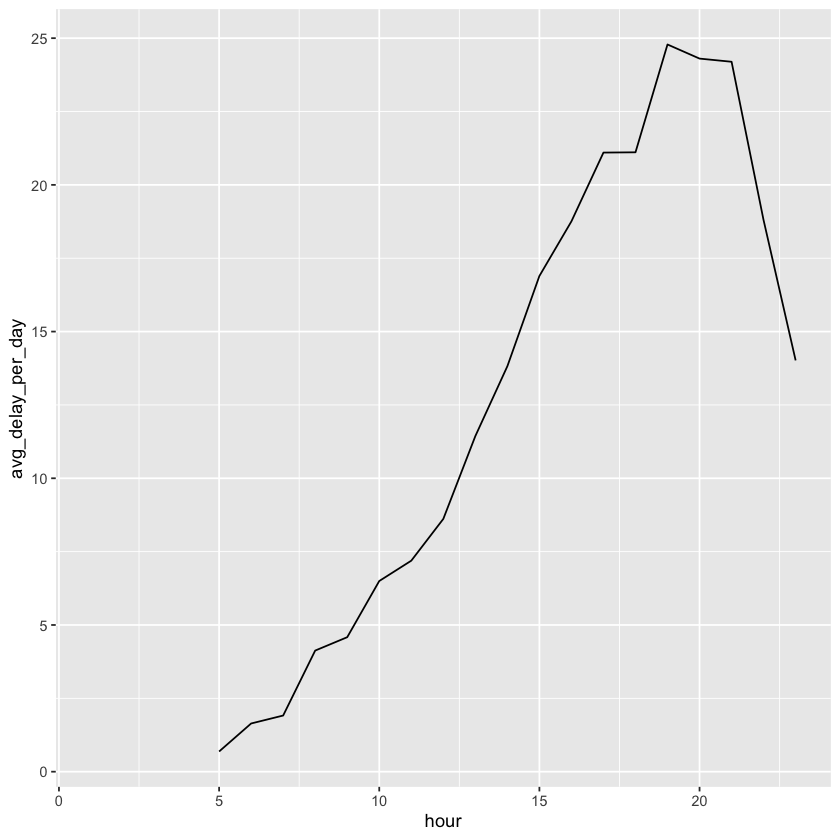

In [8]:
# 3. How do delays vary over the course of the day?
# Illustrate your answer with a plot.

flights |>
  group_by(hour) |>
  summarize(
      avg_delay_per_day = mean(dep_delay, na.rm = TRUE), 
      .groups = "keep"
  ) |>
  ggplot(aes(x = hour, y = avg_delay_per_day)) +
  geom_line(na.rm = TRUE)

4. What happens if you supply a negative n to slice_min() and friends?

A negative value of n or prop will be subtracted from the group size. For example, n = -2 with a group of 5 rows will select 5 - 2 = 3 rows; prop = -0.25 with 8 rows will select 8 * (1 - 0.25) = 6 rows.

5. Explain what count() does in terms of the dplyr verbs you just learned. What does the sort argument to count() do?

sort: If TRUE, will show the largest groups at the top.

In [9]:
# 6. Suppose we have the following tiny data frame:

df <- tibble(
  x = 1:5,
  y = c("a", "b", "a", "a", "b"),
  z = c("K", "K", "L", "L", "K")
)

df |>
  group_by(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
2,b,K
3,a,L
4,a,L
5,b,K


In [10]:
df |>
  arrange(y) # sorts y values as aaabb in ascending order

x,y,z
<int>,<chr>,<chr>
1,a,K
3,a,L
4,a,L
2,b,K
5,b,K


In [11]:
df |>
  group_by(y) |>
  summarize(mean_x = mean(x))

# for every distinct y value (a, b) it calculates the mean of x values

y,mean_x
<chr>,<dbl>
a,2.666667
b,3.500000


In [12]:
df |>
  group_by(y, z) |>
  summarize(mean_x = mean(x))

# for every distinct y and z pair (aK aL bK) it calculates the mean of x values

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


In [13]:
df |>
  group_by(y, z) |>
  summarize(mean_x = mean(x), .groups = "drop")

# The resulting data frame is not grouped

y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


In [14]:
df |>
  group_by(y, z) |>
  summarize(mean_x = mean(x))

df |>
  group_by(y, z) |>
  mutate(mean_x = mean(x))

# with summarize there are 3 rows, but for mutate there are 5.
# summarize has 1 row for every distinct combination.
# mutate has same number of rows as original data frame.

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


x,y,z,mean_x
<int>,<chr>,<chr>,<dbl>
1,a,K,1.0
2,b,K,3.5
3,a,L,3.5
4,a,L,3.5
5,b,K,3.5


## 3.6 Case study: aggregates and sample size

Whenever you do any aggregation, it’s always a good idea to include a count (n()). That way, you can ensure that you’re not drawing conclusions based on very small amounts of data. We’ll demonstrate this with some baseball data from the Lahman package. Specifically, we will compare what proportion of times a player gets a hit (H) vs. the number of times they try to put the ball in play (AB).

When we plot the skill of the batter (measured by the batting average, performance) against the number of opportunities to hit the ball (measured by times at bat, n), you see two patterns:

1. The variation in performance is larger among players with fewer at-bats. The shape of this plot is very characteristic: whenever you plot a mean (or other summary statistics) vs. group size, you’ll see that the variation decreases as the sample size increases.

2. There’s a positive correlation between skill (performance) and opportunities to hit the ball (n) because teams want to give their best batters the most opportunities to hit the ball.

This also has important implications for ranking. If you naively sort on desc(performance), the people with the best batting averages are clearly the ones who tried to put the ball in play very few times and happened to get a hit, they’re not necessarily the most skilled players.

`batters |> 
  arrange(desc(performance))`

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


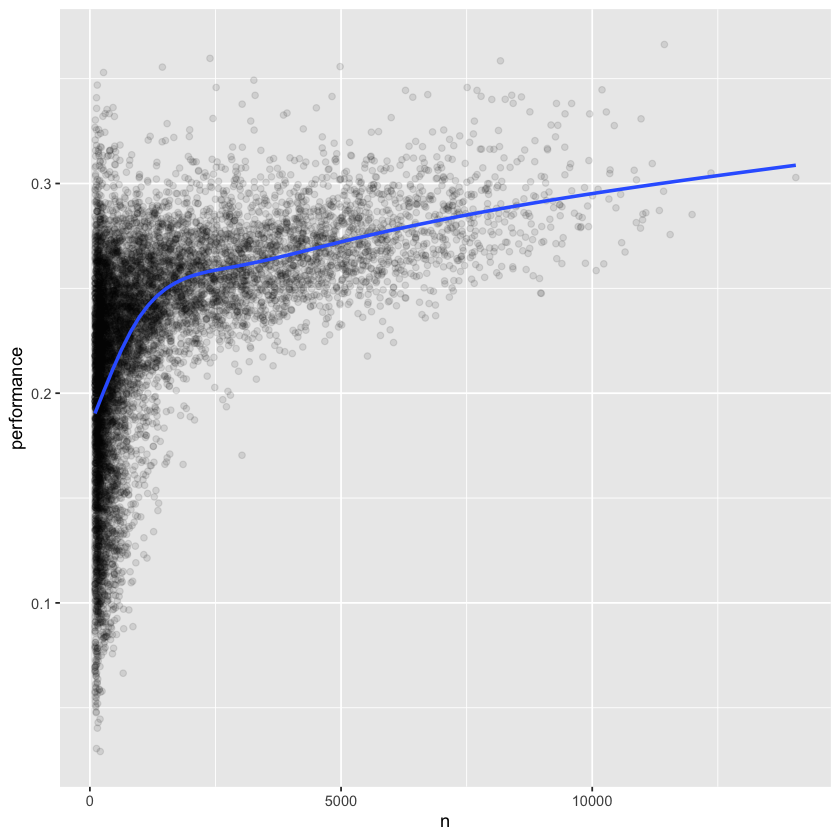

In [15]:
#install.packages("Lahman")

batters <- Lahman::Batting |> 
  group_by(playerID) |> 
  summarize(
    performance = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    n = sum(AB, na.rm = TRUE)
  )

batters |> 
  filter(n > 100) |> 
  ggplot(aes(x = n, y = performance)) +
  geom_point(alpha = 1 / 10) + 
  geom_smooth(se = FALSE)